# Summary

Get a feel for the youtube transcript API. Some questions to address:

- Do all/most videos have transcripts available?
- How good is transcript quality?
- How long are time chunks? Do they correspond to sentence start/ends?
- For videos with multiple people, do we know who's talking when?

In [1]:
%load_ext autoreload
%autoreload 2

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
from youtube_transcript_api import YouTubeTranscriptApi

from jabberwocky.config import C
from jabberwocky.openai_utils import query_gpt3
from jabberwocky.utils import load_prompt, load_api_key, print_response
from jabberwocky.youtube import text_segment
from htools import *

In [3]:
cd_root()

Current directory: /Users/hmamin/jabberwocky


In [12]:
def video_id(url):
    parts = url.split('watch?v=')
    assert len(parts) == 2, 'Unrecognized url format. URL should look like ' \
                            'https://www.youtube.com/watch?v=asjasdjfh'
    return parts[-1]

In [15]:
gan_url = 'https://www.youtube.com/watch?v=9JpdAg6uMXs'
gan_id = video_id(gan_url)

In [18]:
chunks = YouTubeTranscriptApi.get_transcript(gan_id)
len(chunks)

809

In [20]:
df = pd.DataFrame(chunks)
df.ends()

,text,start,duration
0,um thank you all for coming this is a,0.00,6.660
1,massive room so today we will have six,1.92,8.219
807,[Music],1881.41,3.470
808,you,1882.82,2.060


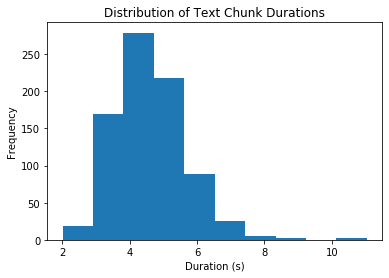

In [25]:
df.duration.plot.hist()
plt.xlabel('Duration (s)')
plt.title('Distribution of Text Chunk Durations')
plt.show()

In [32]:
text_segment(df, 120, 240)

"provided either by another model or by an optimization algorithm so the phrase episode training now applies to lots of ideas that are both new and old the way that we use the phrase adverse sail training now it could apply to things like and an agent playing a game against a copy of itself like Arthur Samuels checkers player back in the 1950s so it's important to recognize that when we use the phrase adversarial training today we're not only referring to things that were invented recently but the usage has expanded to encompass a lot of older things that also had other names like robust optimization most of the day's workshop is about a specific kind of adverse ale training which is training of generative adversarial networks in the context of generative adversarial networks both both players in the game are neural networks and the goal is to learn to generate data that resembles the data that was in the training set the reason that we call the training process for generative adverse 

In [35]:
transcripts = YouTubeTranscriptApi.list_transcripts(gan_id)

In [36]:
trans = transcripts.find_manually_created_transcript(['en'])

NoTranscriptFound: 
Could not retrieve a transcript for the video https://www.youtube.com/watch?v=9JpdAg6uMXs! This is most likely caused by:

No transcripts were found for any of the requested language codes: ['en']

For this video (9JpdAg6uMXs) transcripts are available in the following languages:

(MANUALLY CREATED)
None

(GENERATED)
 - en ("English (auto-generated)")[TRANSLATABLE]

(TRANSLATION LANGUAGES)
 - af ("Afrikaans")
 - sq ("Albanian")
 - am ("Amharic")
 - ar ("Arabic")
 - hy ("Armenian")
 - az ("Azerbaijani")
 - bn ("Bangla")
 - eu ("Basque")
 - be ("Belarusian")
 - bs ("Bosnian")
 - bg ("Bulgarian")
 - my ("Burmese")
 - ca ("Catalan")
 - ceb ("Cebuano")
 - zh-Hans ("Chinese (Simplified)")
 - zh-Hant ("Chinese (Traditional)")
 - co ("Corsican")
 - hr ("Croatian")
 - cs ("Czech")
 - da ("Danish")
 - nl ("Dutch")
 - en ("English")
 - eo ("Esperanto")
 - et ("Estonian")
 - fil ("Filipino")
 - fi ("Finnish")
 - fr ("French")
 - gl ("Galician")
 - ka ("Georgian")
 - de ("German")
 - el ("Greek")
 - gu ("Gujarati")
 - ht ("Haitian Creole")
 - ha ("Hausa")
 - haw ("Hawaiian")
 - iw ("Hebrew")
 - hi ("Hindi")
 - hmn ("Hmong")
 - hu ("Hungarian")
 - is ("Icelandic")
 - ig ("Igbo")
 - id ("Indonesian")
 - ga ("Irish")
 - it ("Italian")
 - ja ("Japanese")
 - jv ("Javanese")
 - kn ("Kannada")
 - kk ("Kazakh")
 - km ("Khmer")
 - rw ("Kinyarwanda")
 - ko ("Korean")
 - ku ("Kurdish")
 - ky ("Kyrgyz")
 - lo ("Lao")
 - la ("Latin")
 - lv ("Latvian")
 - lt ("Lithuanian")
 - lb ("Luxembourgish")
 - mk ("Macedonian")
 - mg ("Malagasy")
 - ms ("Malay")
 - ml ("Malayalam")
 - mt ("Maltese")
 - mi ("Maori")
 - mr ("Marathi")
 - mn ("Mongolian")
 - ne ("Nepali")
 - no ("Norwegian")
 - ny ("Nyanja")
 - or ("Odia")
 - ps ("Pashto")
 - fa ("Persian")
 - pl ("Polish")
 - pt ("Portuguese")
 - pa ("Punjabi")
 - ro ("Romanian")
 - ru ("Russian")
 - sm ("Samoan")
 - gd ("Scottish Gaelic")
 - sr ("Serbian")
 - sn ("Shona")
 - sd ("Sindhi")
 - si ("Sinhala")
 - sk ("Slovak")
 - sl ("Slovenian")
 - so ("Somali")
 - st ("Southern Sotho")
 - es ("Spanish")
 - su ("Sundanese")
 - sw ("Swahili")
 - sv ("Swedish")
 - tg ("Tajik")
 - ta ("Tamil")
 - tt ("Tatar")
 - te ("Telugu")
 - th ("Thai")
 - tr ("Turkish")
 - tk ("Turkmen")
 - uk ("Ukrainian")
 - ur ("Urdu")
 - ug ("Uyghur")
 - uz ("Uzbek")
 - vi ("Vietnamese")
 - cy ("Welsh")
 - fy ("Western Frisian")
 - xh ("Xhosa")
 - yi ("Yiddish")
 - yo ("Yoruba")
 - zu ("Zulu")

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are using and provide the information needed to replicate the error. Also make sure that there are no open issues which already describe your problem!

In [38]:
trans = transcripts.find_generated_transcript(['en'])

In [40]:
vars(trans)

{'_http_client': <requests.sessions.Session at 0x11f6adfd0>,
 '_translation_languages_dict': {'af': 'Afrikaans',
  'am': 'Amharic',
  'ar': 'Arabic',
  'az': 'Azerbaijani',
  'be': 'Belarusian',
  'bg': 'Bulgarian',
  'bn': 'Bangla',
  'bs': 'Bosnian',
  'ca': 'Catalan',
  'ceb': 'Cebuano',
  'co': 'Corsican',
  'cs': 'Czech',
  'cy': 'Welsh',
  'da': 'Danish',
  'de': 'German',
  'el': 'Greek',
  'en': 'English',
  'eo': 'Esperanto',
  'es': 'Spanish',
  'et': 'Estonian',
  'eu': 'Basque',
  'fa': 'Persian',
  'fi': 'Finnish',
  'fil': 'Filipino',
  'fr': 'French',
  'fy': 'Western Frisian',
  'ga': 'Irish',
  'gd': 'Scottish Gaelic',
  'gl': 'Galician',
  'gu': 'Gujarati',
  'ha': 'Hausa',
  'haw': 'Hawaiian',
  'hi': 'Hindi',
  'hmn': 'Hmong',
  'hr': 'Croatian',
  'ht': 'Haitian Creole',
  'hu': 'Hungarian',
  'hy': 'Armenian',
  'id': 'Indonesian',
  'ig': 'Igbo',
  'is': 'Icelandic',
  'it': 'Italian',
  'iw': 'Hebrew',
  'ja': 'Japanese',
  'jv': 'Javanese',
  'ka': 'Georgian',


In [41]:
trans.is_generated

True

In [42]:
trans.is_translatable

True

In [43]:
bio_url = 'https://www.youtube.com/watch?v=NNnIGh9g6fA'

In [44]:
transcripts = YouTubeTranscriptApi.list_transcripts(video_id(bio_url))

In [59]:
transcripts._generated_transcripts

{'en': <youtube_transcript_api._transcripts.Transcript at 0x11eb6c6a0>}

In [60]:
transcripts._manually_created_transcripts

{'en': <youtube_transcript_api._transcripts.Transcript at 0x11eb6c6d8>}

In [55]:
for t in transcripts:
    print(t.is_generated)
    print(t.language_code)

False
en
True
en


In [48]:
trans = transcripts.find_transcript(['en'])
trans.is_generated

False

In [50]:
rows = trans.fetch()

In [52]:
pd.DataFrame(rows)

,text,start,duration
0,[MUSIC PLAYING],0.000,4.940
1,Stanford University.,4.940,0.920
2,"This is BIO 150, isn't it?",9.360,3.370
3,"OK, just wanted to make sure.",12.730,2.740
4,So we start off with a scenario.,15.470,3.420
...,...,...,...
1344,[LAUGHTER],3414.670,6.527
1345,Just to get that up there.,3421.197,1.083
1346,12:15.,3422.280,0.805
1347,More questions?,3423.085,0.625


In [114]:
def get_transcripts(url):
    id_ = video_id(url)
    types = {True: 'generated', False: 'manual'}
    results = dict.fromkeys(types.values())
    for trans in YouTubeTranscriptApi.list_transcripts(id_):
        if trans.language_code == 'en':
            rows = trans.fetch()
            results[types[trans.is_generated]] = pd.DataFrame(rows)
    return DotDict(**results, id=id_)

In [115]:
res = get_transcripts(bio_url)

In [116]:
res.manual.ends()

,text,start,duration
0,[MUSIC PLAYING],0.000,4.940
1,Stanford University.,4.940,0.920
1347,More questions?,3423.085,0.625
1348,"For more, please visit\nus at standord.edu.",3430.070,3.260


In [117]:
res.generated.ends()

,text,start,duration
0,[Music],0.67,3.31
1,Stanford University,4.43,3.09
1349,twelve fifteen more questions any are,3422.39,11.69
1350,for more please visit us at stanford.edu,3429.25,4.83


In [89]:
res.id

'NNnIGh9g6fA'

Chunks are definitely not perfectly aligned but I'm hoping they're both granular enough that my text_segment() function can extract roughly aligned segments.

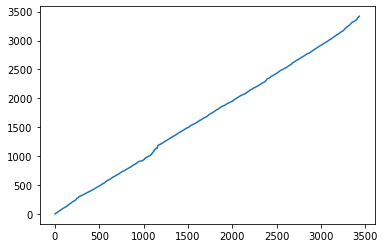

In [92]:
nrows = min(res.manual.shape[0], res.generated.shape[0])
plt.plot(res.manual.start.iloc[:nrows], res.generated.start.iloc[:nrows])
plt.show()

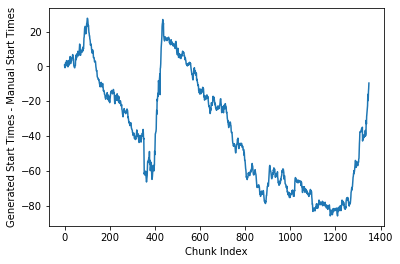

In [101]:
plt.plot(res.generated.start.iloc[:nrows] - res.manual.start.iloc[:nrows])
plt.xlabel('Chunk Index')
plt.ylabel('Generated Start Times - Manual Start Times')
plt.show()

In [99]:
res.generated.iloc[1200:1205]

,text,start,duration
1200,there will be a Q&A there will be course,3013.579,4.740
1201,logistics some of the slides will be put,3015.680,4.919
1202,up in there make use of that there will,3018.319,4.800
1203,be announcements about time changing for,3020.599,4.951
1204,office hours and things like that make,3023.119,4.561


In [100]:
res.manual.iloc[1200:1205]

,text,start,duration
1200,"the class before\nhere is humongous,",3095.74,2.39
1201,and thus we have the\nimpossible problem,3098.13,2.21
1202,of a lot of people\ntrying to get out,3100.34,1.77
1203,of that while a lot of people\nare trying to g...,3102.11,2.48
1204,It might work best for everybody\nto come in f...,3104.59,2.95


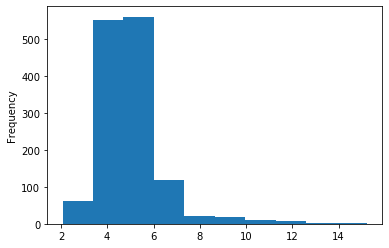

In [102]:
res.generated.duration.plot.hist()

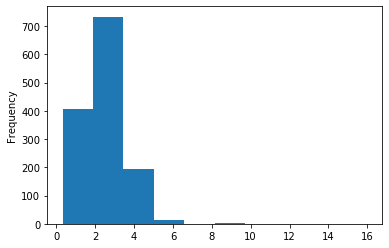

In [103]:
res.manual.duration.plot.hist()

Manual transcript's durations tend to be a bit shorter.

In [105]:
print(text_segment(res.manual, 300, 330))

was part of what a jury said led
them to exonerate the person. A literature showing that
a disproportionate share of female aggression comes
around the time of menses. Next one-- there is an area of
the brain you will know so much about over the next three
months called the amygdala that has something
to do with aggression and has something
to do with fear. And you get a brain tumor
there, and in a number of cases, you get someone who is
uncontrollably violent. And this has also been used
successfully in a court of law. Junk food-- any of you who are
San Francisco history buffs


In [106]:
print(text_segment(res.generated, 300, 330))

them to exonerate the person a literature showing that a disproportionate share of female aggression comes around the time of menses next one there is an area the brain you will know so much about over the next three months called the amygdala that has something to do with aggression and has something to do with fear and you get a brain tumor there and in a number of cases you get someone who is uncontrollably violent and this has also been used successfully in a court of law junk food any of you who are San


Not bad. These are actually aligned fairly well.

In [118]:
gan_res = get_transcripts(gan_url)

In [120]:
gan_res.manual is None

True

In [127]:
gan_res.generated.ends()

,text,start,duration
0,um thank you all for coming this is a,0.00,6.660
1,massive room so today we will have six,1.92,8.219
807,[Music],1881.41,3.470
808,you,1882.82,2.060


In [122]:
lex_url = 'https://www.youtube.com/watch?v=9EN_HoEk3KY'
lex_res = get_transcripts(lex_url)

In [124]:
lex_res.manual is None

True

In [126]:
lex_res.generated.ends()

,text,start,duration
0,welcome back to 6 SZ row 99 artificial,0.030,5.910
1,general intelligence today we have Ilya,2.939,8.881
1368,[Applause],3595.130,5.139
1369,you,3605.800,2.060


In [133]:
meta_url = 'https://www.youtube.com/watch?v=DRBREvFL19g'
meta_res = get_transcripts(meta_url)

In [138]:
print(text_segment(meta_res.manual, 600, 750))

So you need a primer here, and
the primer is made by primase. Once primase makes a primer,
polymerase can chug along and do it just fine. Let's check out the
other strand. Primer here, polymerase
chugs along. But now as this double
helix opens up, what happens over here? The synthesis going this way. So what do I have to do here? AUDIENCE: [INAUDIBLE]. ERIC LANDER: Another primer. Need another primer. Then as it opens up more,
what do I need? AUDIENCE: Another primer. ERIC LANDER: Another primer. So the two strands are
experiencing very different kind of replication. In one place, one primer in the
five prime to three prime direction is enough
to keep going. In the other strand, as it keeps
opening up, you gotta keep making primers. You have all these little
fragments there. Now, those little fragments were
discovered by Okazaki, and they are called
Okazaki fragments. Again, I just mention
these things. They are known to molecular
biologists. But these little guys are
Okazaki fragments

In [160]:
ml = load_prompt('simplify_ml')
print(ml)

My fifth grader asked me what this passage means. I rephrased it for him, in plain language a fifth grader can understand.

Passage:
Here we show that scaling up language models greatly improves task-agnostic, few-shot performance, sometimes even reaching competitiveness with prior state-of-the-art finetuning approaches. Specifically, we train GPT-3, an autoregressive language model with 175 billion parameters, 10x more than any previous non-sparse language model, and test its performance in the few shot setting. For all tasks, GPT-3 is applied with any gradient updates or fine-tuning, with tasks and few-shot demonstrations specified purely via text interaction with the model.
Summary:
Larger language models can do well on new tasks they weren't trained on. We trained the biggest language model ever and tested it on new tasks, and it did really well. This model can perform new tasks without any extra training.

Passage:
Second, the potential to exploit spurious correlations in training

In [167]:
txt = """The problem of answering questions using knowledge from pre-trained
language models (LMs) and knowledge graphs (KGs) presents
two challenges: given a QA context (question
and answer choice), methods need to (i)
identify relevant knowledge from large KGs,
and (ii) perform joint reasoning over the QA
context and KG. Here we propose a new
model which addresses the above
challenges through two key innovations: (i)
relevance scoring, where we use LMs to estimate the importance of KG nodes
relative to the given QA context, and (ii) joint reasoning,
where we connect the QA context and KG
to form a joint graph, and mutually update
their representations through graph-based
message passing.""".replace('\n', ' ')
prompt = ml.format(txt)

In [162]:
print(prompt)

My fifth grader asked me what this passage means. I rephrased it for him, in plain language a fifth grader can understand.

Passage:
Here we show that scaling up language models greatly improves task-agnostic, few-shot performance, sometimes even reaching competitiveness with prior state-of-the-art finetuning approaches. Specifically, we train GPT-3, an autoregressive language model with 175 billion parameters, 10x more than any previous non-sparse language model, and test its performance in the few shot setting. For all tasks, GPT-3 is applied with any gradient updates or fine-tuning, with tasks and few-shot demonstrations specified purely via text interaction with the model.
Summary:
Larger language models can do well on new tasks they weren't trained on. We trained the biggest language model ever and tested it on new tasks, and it did really well. This model can perform new tasks without any extra training.

Passage:
Second, the potential to exploit spurious correlations in training

In [165]:
res = query_gpt3(prompt, engine_i=3, temperature=.3, max_tokens=100, 
                 stop='Passage:')

In [166]:
print_response(*res)

My fifth grader asked me what this passage means. I rephrased it for him, in plain language a fifth grader can understand.

Passage:
Here we show that scaling up language models greatly improves task-agnostic, few-shot performance, sometimes even reaching competitiveness with prior state-of-the-art finetuning approaches. Specifically, we train GPT-3, an autoregressive language model with 175 billion parameters, 10x more than any previous non-sparse language model, and test its performance in the few shot setting. For all tasks, GPT-3 is applied with any gradient updates or fine-tuning, with tasks and few-shot demonstrations specified purely via text interaction with the model.
Summary:
Larger language models can do well on new tasks they weren't trained on. We trained the biggest language model ever and tested it on new tasks, and it did really well. This model can perform new tasks without any extra training.

Passage:
Second, the potential to exploit spurious correlations in training